In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

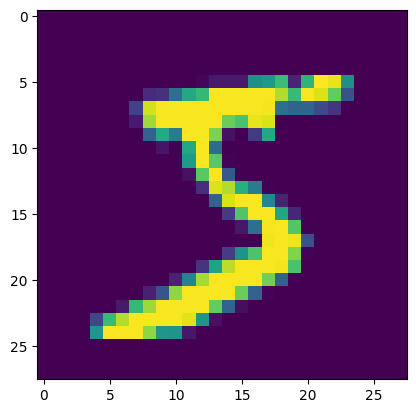

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2882 - accuracy: 0.9186 - val_loss: 0.1545 - val_accuracy: 0.9557
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1277 - accuracy: 0.9631 - val_loss: 0.1219 - val_accuracy: 0.9648
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.1029 - val_accuracy: 0.9712
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0665 - accuracy: 0.9798 - val_loss: 0.0940 - val_accuracy: 0.9712
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0513 - accuracy: 0.9847 - val_loss: 0.0884 - val_accuracy: 0.9739
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.0840 - val_accuracy: 0.9750
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0938 - val_accuracy:

In [11]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pred=y_prob.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9786

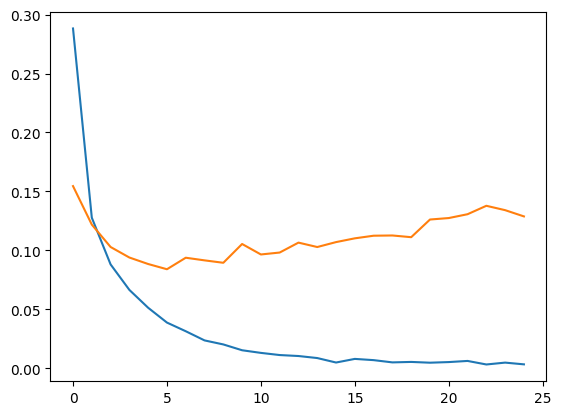

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

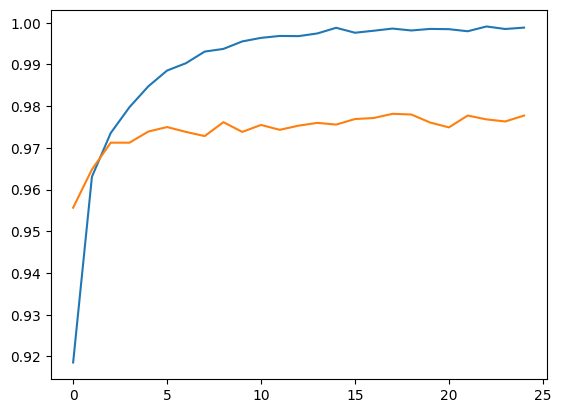

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

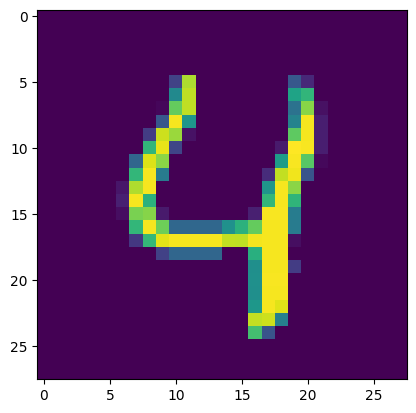

In [16]:
plt.imshow(X_test[4])